# Exam Jan 2024

Exercise 1 

1.6 Exam vB, PROBLEM 1
Maximum Points = 14
In this problem you will do rejection sampling from complicated distributions, you will also be using your samples to compute certain integrals, a method known as Monte Carlo integration: (Keep in mind that choosing a good sampling distribution is often key to avoid too much rejection)
1. [4p]Fill in the remaining part of the function problem1_inversion in order to produce samples from the below distribution using rejection sampling:
$$ F[x] =
\begin{cases}
0 & \text{if } x \leq 0 \\
\frac{e^{x^2} - 1}{e-1} & \text{if } 0 < x < 1 \\
1 & \text{if } x \geq 1
\end{cases} $$

2. [2p] Produce 100000 samples (use fewer if it times-out and you cannot find a solution) and put the answer in problem1_samples from the above distribution and plot the histogram together with the true density. (There is a timeout decorator on this function and if it takes more than 10 seconds to generate 100000 samples it will timeout and it will count as if you failed to generate.)
3. [2p]Us the above 100000 samples (problem1_samples) to approximately compute the integral
$$\int_0^{1} \sin(x) \frac{2e^{x^2} - 1}{e-1}\, dx $$
and store the result in problem1_integral.

4. [2p] Use Hoeffdings inequality to produce a 95% confidence interval of the integral above and
store the result as a tuple in the variable problem1_interval
5. [4p] Fill in the remaining part of the function problem1_inversion_2 in order to produce samples from the below distribution using rejection sampling:
$$ F[x] =
\begin{cases}
0 & \text{if } x \leq 0 \\
20x e^{20 - \frac{1}{x}} & \text{if } 0 < x < 1/20 \\
1 & \text{if } x \geq 1/20
\end{cases} $$

Hint: this is tricky because if you choose the wrong sampling distribution you reject at least
9 times out of 10. You will get points based on how long your code takes to create a certain number of samples, if you choose the correct sampling distribution you can easily create 100000 samples within 2 seconds.



In [1]:
# Part 1 
import numpy as np

def problem1_inversion(n_samples=1):
    # Target density function f(x)
    def f_(x):
        return (np.exp(x**2) - 1) / (np.exp(1) - 1)
    
    # We choose M such that M >= max(f(x)) for x in [0, 1]
    # Since f(x) increases as x increases in the interval (0, 1), M should be the maximum of f(1)
    M = f_(1)  # f(x) is maximized at x = 1
    print(M)
    np.random.seed(42)  
    accepted_samples = []
    
    while len(accepted_samples) < n_samples:
        # Generate a candidate x from uniform distribution (0, 1)
        x = np.random.uniform(0, 1)
        # Generate sample from uniform distribution (0, 1) for acceptance criteria
        u = np.random.uniform(0, 1)
        
        # Find r(x) = f(x)/M
        r_x = f_(x) / M
        
        # Accept the sample only if u <= r_x
        if u <= r_x:
            accepted_samples.append(x)
    
    # Return the accepted samples as a numpy array
    return np.array(accepted_samples)

# Test the function with 30 samples
print(problem1_inversion(30))


1.0
[0.83244264 0.61185289 0.59241457 0.60754485 0.96563203 0.54671028
 0.96958463 0.82873751 0.77224477 0.77127035 0.86310343 0.33089802
 0.88721274 0.90756647 0.80367208 0.892559   0.9429097  0.96244729
 0.28484049 0.90826589 0.98565045 0.67756436 0.64517279 0.93672999
 0.90041806 0.64203165 0.60642906 0.65196126 0.71217922 0.97301055]


1.0
[0.83244264 0.61185289 0.59241457 ... 0.98494302 0.86170295 0.54081135]


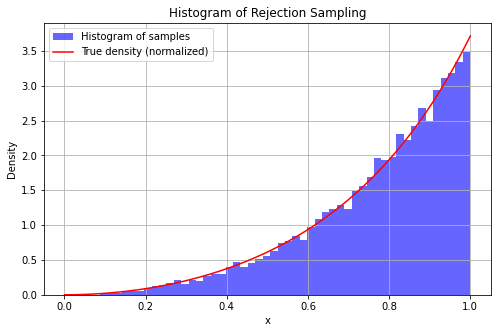

In [7]:

# Part 2
import matplotlib.pyplot as plt
import numpy as np

problem1_samples =  problem1_inversion(10000)
print(problem1_samples)

# Plot the distribution of the samples
plt.figure(figsize=(8, 5))
plt.hist(problem1_samples, bins=50, density=True, alpha=0.6, color='blue', label='Histogram of samples')

# Plot the actual distribution for comparison
x_vals = np.linspace(0, 1, 1000)
f_vals = (np.exp(x_vals**2) - 1) / (np.exp(1) - 1)  # Unnormalized density
# trapz: is one of the simplest numerical integration methods and is quite efficient for approximating integrals of discrete functions.
plt.plot(x_vals, f_vals / np.trapz(f_vals, x_vals), color='red', label='True density (normalized)')

plt.title('Histogram of Rejection Sampling')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()


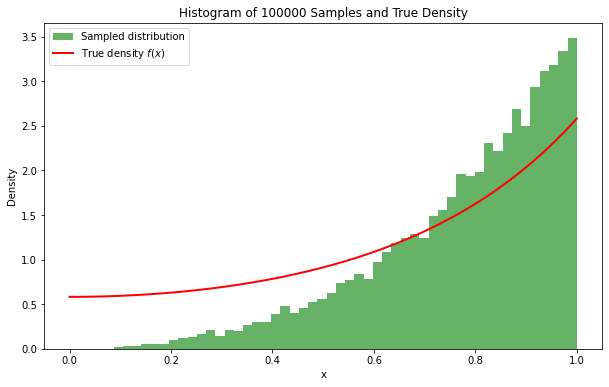

Approximated integral value: 1.2375560171531


In [5]:
# Part 3


import numpy as np
import matplotlib.pyplot as plt

# Define the corrected target density function f(x)
def f_(x):
    return (2 * np.exp(x**2) - 1) / (np.exp(1) - 1)

# Define the corrected function we want to integrate
def integrand(x):
    return np.sin(x) * f_(x)

# Plotting the histogram and the true density function
x_vals = np.linspace(0, 1, 500)
y_vals = f_(x_vals)

plt.figure(figsize=(10, 6))
plt.hist(problem1_samples, bins=50, density=True, alpha=0.6, color='g', label="Sampled distribution")
plt.plot(x_vals, y_vals, label="True density $f(x)$", color='r', linewidth=2)
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.title("Histogram of 100000 Samples and True Density")
plt.show()

# Now, approximate the integral
integral_value = np.mean(integrand(problem1_samples))

# Store the result in problem1_integral
problem1_integral = integral_value

# Output the result
print("Approximated integral value:", problem1_integral)



In [10]:
# Part 4


# The bounds of the integrand (based on the sine and the f(x) function)
a = 0  # Lower bound (since sin(x) >= 0 and f(x) >= 0 in [0, 1])
b = 1  # Upper bound (since sin(x) <= 1 and f(x) is max at x=1)

# Confidence level delta = 0.05 (for 95% confidence)
delta = 0.05
# Number of samples
n_samples = len(problem1_samples)

# Hoeffding's inequality calculation for confidence interval
# We need to compute the range of the integrand and apply the formula
range_of_integrand = b - a  # The range is simply 1 - 0 = 1 for sin(x)*f(x)
confidence_interval_radius = np.sqrt((range_of_integrand**2 * np.log(1/delta)) / (2 * n_samples))

# Compute the 95% confidence interval
lower_bound = problem1_integral - confidence_interval_radius
upper_bound = problem1_integral + confidence_interval_radius

# Store the result in problem1_interval
problem1_interval = [lower_bound, upper_bound]

# Output the result
print("95% Confidence Interval:", problem1_interval)


95% Confidence Interval: [1.225317282999696, 1.249794751306504]


In [24]:
# Part 5
def problem1_inversion_2(n_samples=1):

# Distribution from part 2
# write the code in this function to produce samples from the distribution␣in the assignment
# Make sure you choose a good sampling distribution to avoid unnecessary␣rejections
    # Return a numpy array of length n_samples
    import numpy as np
    # Target density function f(x)
    def f(x):
        return 20 * x * np.exp(20 - 1 / x)
    
    # Proposal distribution g(x) (uniform in the range (0, 1/20))
    def g(x):
        return 1 / (1 / 20)  # Uniform distribution, constant value in range (0, 1/20)

    # Find the maximum value of f(x) over the range (0, 1/20)
    x_values = np.linspace(0.0001, 1/20, 1000)  # Small x value to avoid division by zero at 0
    max_f = np.max(f(x_values))  # The maximum value of f(x) in the interval

    # Rejection sampling process
    np.random.seed(42)  # For reproducibility
    accepted_samples = []

    while len(accepted_samples) < n_samples:
        # Step 1: Sample x from the proposal distribution g(x) (uniform between 0 and 1/20)
        x = np.random.uniform(0, 1/20)
        
        # Step 2: Sample u from uniform distribution (0, 1)
        u = np.random.uniform(0, 1)
        
        # Step 3: Accept the sample with probability f(x) / (M * g(x))
        if u <= f(x) / (max_f * g(x)):
            accepted_samples.append(x)
    
    accepted_samples = np.array(accepted_samples)
    
    return accepted_samples
samples = problem1_inversion_2(100000)
#print(samples)


KeyboardInterrupt: 

In [25]:
import numpy as np

def problem1_inversion_2(n_samples=1):
    # Target density function f(x)
    def f(x):
        return 20 * x * np.exp(20 - 1 / x)
    
    # Proposal distribution g(x) (exponential distribution)
    def g(x, lambda_):
        return lambda_ * np.exp(-lambda_ * x)  # Exponential PDF with rate lambda
    
    # Find the maximum value of f(x) over the range (0, 1/20)
    x_values = np.linspace(0.0001, 1/20, 1000)  # Small x value to avoid division by zero at 0
    max_f = np.max(f(x_values))  # The maximum value of f(x) in the interval

    # Rejection sampling process
    np.random.seed(42)  # For reproducibility
    accepted_samples = []

    # Choose a lambda for the exponential distribution based on the shape of f(x)
    lambda_ = 50  # Adjust this parameter for a better fit (you may need to experiment with this)

    while len(accepted_samples) < n_samples:
        # Step 1: Sample x from the proposal distribution g(x) (exponential distribution)
        x = np.random.exponential(1 / lambda_)  # Scale parameter = 1 / lambda
        
        if x > 1/20:  # Reject if x exceeds the upper bound of 1/20
            continue
        
        # Step 2: Sample u from uniform distribution (0, 1)
        u = np.random.uniform(0, 1)
        
        # Step 3: Accept the sample with probability f(x) / (M * g(x))
        if u <= f(x) / (max_f * g(x, lambda_)):
            accepted_samples.append(x)
    
    accepted_samples = np.array(accepted_samples)
    
    return accepted_samples

# Example usage
samples = problem1_inversion_2(100000)


KeyboardInterrupt: 

In [26]:
import numpy as np

def problem1_inversion_2(n_samples=1):
    # Target density function f(x)
    def f(x):
        return 20 * x * np.exp(20 - 1 / x)
    
    # Proposal distribution g(x) (gamma distribution)
    def g(x, alpha, beta):
        # Gamma PDF: shape=alpha, scale=beta
        return (x**(alpha-1) * np.exp(-x/beta)) / (beta**alpha * np.math.gamma(alpha))
    
    # Find the maximum value of f(x) over the range (0, 1/20)
    x_values = np.linspace(0.0001, 1/20, 1000)  # Small x value to avoid division by zero at 0
    max_f = np.max(f(x_values))  # The maximum value of f(x) in the interval

    # Rejection sampling process
    np.random.seed(42)  # For reproducibility
    accepted_samples = []

    # Use a gamma distribution with shape alpha=2 and scale beta=0.005 for better sampling
    alpha = 2  # Shape parameter (tune for better fitting)
    beta = 0.005  # Scale parameter (tune for better fitting)

    while len(accepted_samples) < n_samples:
        # Sample x from the proposal distribution g(x) (gamma distribution)
        x = np.random.gamma(alpha, beta)
        
        if x > 1/20:  # Reject if x exceeds the upper bound of 1/20
            continue
        
        # Sample u from uniform distribution (0, 1)
        u = np.random.uniform(0, 1)
        
        # Accept the sample with probability f(x) / (M * g(x))
        if u <= f(x) / (max_f * g(x, alpha, beta)):
            accepted_samples.append(x)
    
    accepted_samples = np.array(accepted_samples)
    
    return accepted_samples

# Example usage
samples = problem1_inversion_2(10000) 


/var/folders/bq/qnrb3lm539nfznyv5cmr8rph0000gn/T/ipykernel_42687/3963951670.py:11: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return (x**(alpha-1) * np.exp(-x/beta)) / (beta**alpha * np.math.gamma(alpha))


[0.04784187 0.04973113 0.04687093 0.04890438 0.04859818 0.04510837
 0.04614676 0.04101126 0.04545371 0.0456964 ]


In [29]:
import numpy as np
from scipy.special import beta

def problem1_inversion_2(n_samples=1):
    # Target density function f(x)
    def f(x):
        return 20 * x * np.exp(20 - 1 / x)
    
    # Proposal distribution g(x) using Beta distribution (scaled to the range 0 to 1/20)
    def g(x, alpha=2, beta_param=2):
        return (x**(alpha - 1) * (1 - x)**(beta_param - 1)) / beta(alpha, beta_param)
    
    # Range of x-values to sample from (0, 1/20)
    x_values = np.linspace(0.0001, 1/20, 1000)  
    max_f = np.max(f(x_values))  # Maximum of the target function over the valid range

    # Rejection sampling process
    np.random.seed(42)  
    accepted_samples = []
    
    while len(accepted_samples) < n_samples:
        # Sample x from the Beta proposal distribution, scaled to (0, 1/20)
        x = np.random.beta(2, 2) * (1/20)
        
        if x > 1/20:  
            continue
        
        # Sample u from uniform distribution (0, 1)
        u = np.random.uniform(0, 1)
        
        # Accept the sample with probability f(x) / (max_f * g(x))
        if u <= f(x) / (max_f * g(x)):
            accepted_samples.append(x)
    
    accepted_samples = np.array(accepted_samples)
    return accepted_samples

# Example usage
samples = problem1_inversion_2(100000)  # Try a smaller sample size to test


In [30]:
from joblib import Parallel, delayed

def sample_single():
    # Single sample rejection sampling code goes here
    pass

def problem1_inversion_2_parallel(n_samples=1, n_jobs=-1):
    return Parallel(n_jobs=n_jobs)(delayed(sample_single)() for _ in range(n_samples))

samples = problem1_inversion_2_parallel(10000, n_jobs=4)  # Adjust n_jobs for available cores



1. **Match the Support of the Target**:
   - The proposal (sampling) distribution should cover the **support** of the target distribution (where the target density is non-zero). If your target distribution has support on \( (a, b) \), the proposal distribution should also sample over this range.

2. **Shape Considerations**:
   - Choose a proposal distribution whose shape is **roughly similar** to the target distribution, especially where the target density has significant mass. If the target has a sharp peak, a proposal with a similar peak is more efficient.
   - If the target is **bell-shaped** or symmetric (e.g., Gaussian), a **Gaussian proposal** often works well.
   - For **uniform distributions**, use it when the target distribution is **uniform** or has a flat portion in its support.

3. **Simpler Distributions**:
   - Choose a **simple and easy-to-sample** distribution for the proposal (e.g., uniform, exponential, or normal). The easier it is to sample from the proposal, the more efficient the rejection sampling.

4. **Scaling Factor (M)**:
   - After selecting the proposal distribution, choose a **scaling factor (M)** such that the ratio \( \frac{f(x)}{g(x)} \) (where \( f(x) \) is the target and \( g(x) \) is the proposal) is always less than or equal to \( M \).

5. **Avoid High Rejection Rates**:
   - The goal is to minimize rejections. If you’re rejecting a lot of samples, it’s a sign that your proposal distribution doesn't match well with the target, and you should consider trying another one.

Tips:
- For **uniform targets**, use a **uniform proposal**.
- For **Gaussian-like targets**, use a **Gaussian proposal**.
- For distributions with **sharp peaks**, use a **proposal with a similar peak shape** (like a Gaussian or Gamma distribution).


Exercise 2

Let us build a proportional model (P(Y = 1 | X) = G(β0 + β · X) where G is the logistic function) for the spam vs not spam data. Here we assume that the features are presence vs not presence of a word, let X1, X2, X3 denote the presence (1) or absence (0) of the words (”free”, ”prize”, ”win”).
1. [2p] Load the file data/spam.csv and create two numpy arrays, problem2_X which has shape (n_emails,3) where each feature in problem2_X corresponds to X1, X2, X3 from above, problem2_Y which has shape (n_emails,) and consists of a 1 if the email is spam and 0 if it is not. Split this data into a train-calibration-test sets where we have the split 40%, 20%, 40%, put this data in the designated variables in the code cell.
2. [4p] Follow the calculation from the lecture notes where we derive the logistic regression and implement the final loss function inside the class ProportionalSpam. You can use the Test cell to check that it gives the correct value for a test-point.
3. [4p] Train the model problem2_ps on the training data. The goal is to calibrate the prob- abilities output from the model. Start by creating a new variable problem2_X_pred (shape (n_samples,1)) which consists of the predictions of problem2_ps on the calibration dataset. Then train a calibration model using sklearn.tree.DecisionTreeRegressor, store this trained model in problem2_calibrator.
4. [3p] Use the trained model problem2_ps and the calibrator problem2_calibrator to make final predictions on the testing data, store the prediction in problem2_final_predictions. Compute the 0 − 1 test-loss and store it in problem2_01_loss and provide a 99% confidence interval of it, store this in the variable problem2_interval, this should again be a tuple as in problem1.